**IMPORTING THE DATASET**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Import the Dataset view the head contents
DS = pd.read_csv('tripadvisor_review.csv')
DS.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [ ]:
#Changing the column names to better reflect the dataset contents
DS.columns = ["User ID", "Art Galleries", "Dance Clubs", "Juice Bars", "Restaurants", "Museums", "Resorts", "Picnic&Park Spots", "Beaches", "Theaters", "Religious Institutions"]
DS.head()

,User ID,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Picnic&Park Spots,Beaches,Theaters,Religious Institutions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [ ]:
#Summary information on the dataset [1]
DS.describe()

,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Picnic&Park Spots,Beaches,Theaters,Religious Institutions
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [ ]:
#Summary information on the dataset [2]
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 980 non-null    object 
 1   Art Galleries           980 non-null    float64
 2   Dance Clubs             980 non-null    float64
 3   Juice Bars              980 non-null    float64
 4   Restaurants             980 non-null    float64
 5   Museums                 980 non-null    float64
 6   Resorts                 980 non-null    float64
 7   Picnic&Park Spots       980 non-null    float64
 8   Beaches                 980 non-null    float64
 9   Theaters                980 non-null    float64
 10  Religious Institutions  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


**EXPLORATORY DATA PLOTS FOR DATABASE**

<Figure size 1200x600 with 0 Axes>

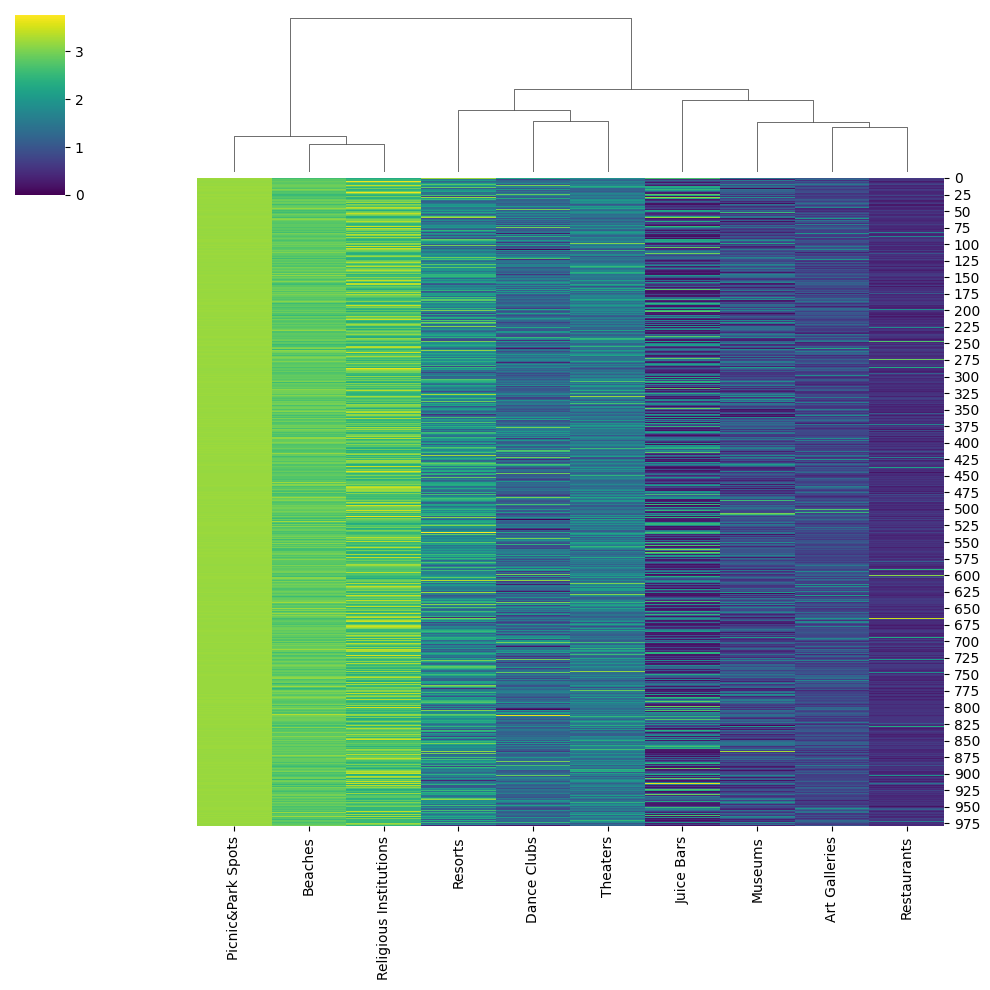

In [ ]:
#Clustermap of Initial dataset
plt.figure(figsize=(12,6))
sns.clustermap(DS.drop("User ID", axis =1), cmap = "viridis", row_cluster = False)

[Text(0.5, 1.0, 'Correlation Values between Dataset Attributes')]

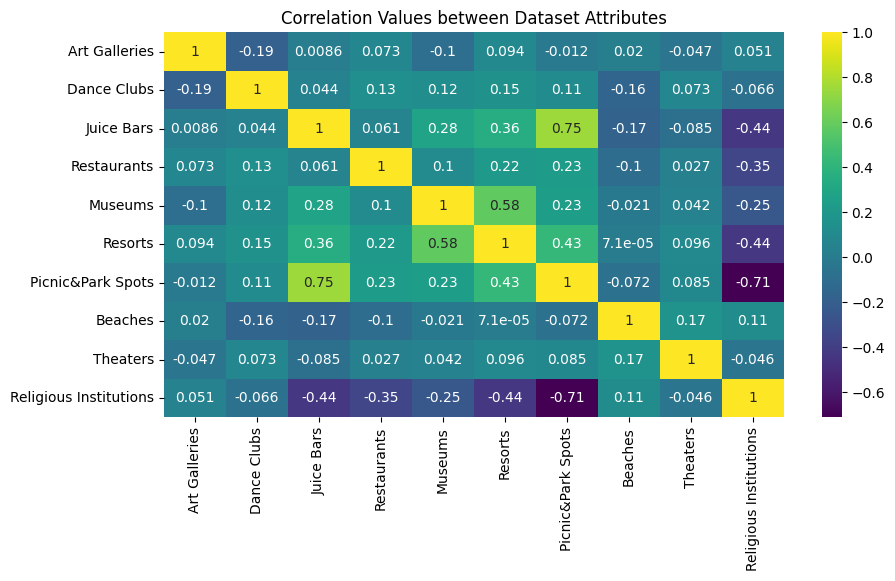

In [ ]:
#Diff heatmap of Initial dataset
plt.figure(figsize=(10,5))
sns.heatmap(DS.drop("User ID", axis =1).corr(), annot=True, cmap = "viridis").set(title="Correlation Values between Dataset Attributes")

In [ ]:
#Isolating the column/attributes we wish to consider for clusteringg from the dataset
X = DS.iloc[:, [9, 10]].values
X

array([[1.82, 2.42],
       [1.86, 2.32],
       [1.31, 2.5 ],
       ...,
       [1.34, 3.02],
       [1.12, 2.46],
       [1.34, 2.4 ]])

[Text(0.5, 1.0, 'Unclustered Scatterplot of Attributes: Theater & Religious Institutions')]

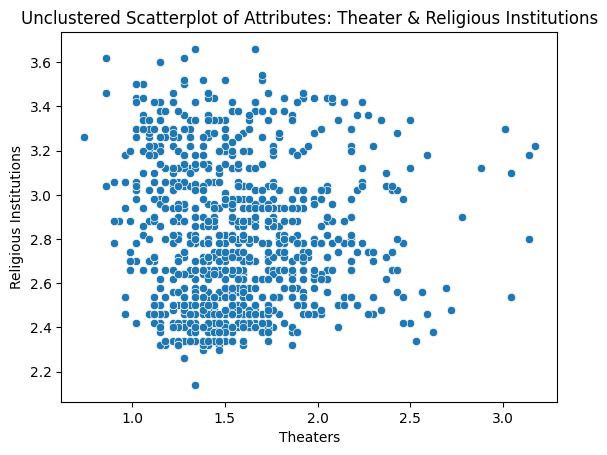

In [ ]:
#Creating a simple scatter plot of the dataset to visualize all the unclustered points
sns.scatterplot(data=DS, x='Theaters', y='Religious Institutions').set(title = "Unclustered Scatterplot of Attributes: Theater & Religious Institutions")

**[1]: KMEANS CLUSTERING WITH ELBOW METHOD**

In [ ]:
#Using the Elbow method to determine the appropriate number of clusters
!pip install sklearn
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of squares
for i in range(1, 12):
  kmn = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
  kmn.fit(X)
  wcss.append(kmn.inertia_)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

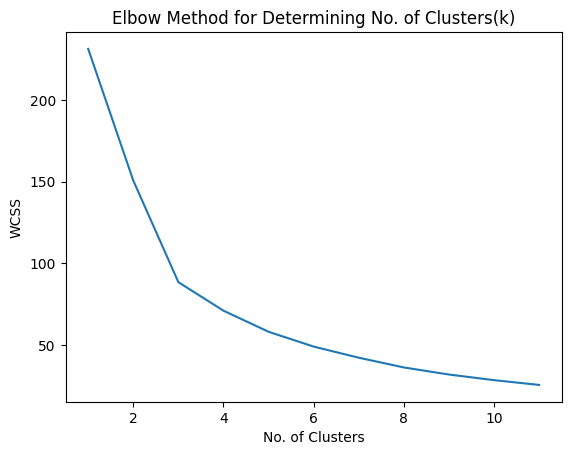

In [ ]:
#plotting the graph for the elbow method
plt.plot(range(1, 12), wcss)
plt.title("Elbow Method for Determining No. of Clusters(k)")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Fitting the Kmeans algorithm and predicting the model outcome
KMalg = KMeans(n_clusters= 3, init = 'k-means++', random_state = 42)
KMy_pred = KMalg.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Printing the predicted values
print(KMy_pred)

[2 2 2 2 2 0 0 0 2 1 2 0 2 1 1 2 0 2 1 2 0 0 0 1 1 2 2 2 0 2 2 2 1 1 1 0 1
 1 2 2 0 0 0 1 1 0 1 0 2 2 0 1 1 2 0 0 2 0 2 2 2 0 1 0 0 2 0 0 0 2 2 2 1 0
 2 2 1 2 0 0 0 1 1 2 1 0 2 0 2 2 0 2 2 2 2 0 1 2 1 1 1 1 2 1 0 2 1 0 0 1 1
 0 1 2 2 2 2 1 1 0 2 2 2 2 2 2 0 2 0 2 0 2 1 2 1 1 2 0 0 1 0 1 0 1 1 0 2 2
 1 2 0 0 2 2 2 1 2 1 2 0 0 1 1 1 0 2 2 1 2 1 1 2 2 0 0 2 0 1 1 1 1 2 2 0 1
 1 2 0 2 0 2 1 0 1 1 0 0 2 0 2 1 1 2 1 2 2 2 1 2 0 0 2 0 2 0 2 0 2 2 0 2 0
 2 0 2 0 2 0 0 2 1 2 0 2 2 1 0 0 2 0 2 2 1 1 1 2 2 2 0 1 2 0 2 2 1 1 0 2 2
 2 1 1 1 1 0 2 2 1 1 2 0 2 2 2 2 0 2 1 0 2 0 2 2 2 0 1 2 1 0 0 2 0 0 1 0 2
 2 2 2 1 0 2 2 1 1 2 1 1 2 2 1 1 2 2 1 1 1 2 2 0 2 1 2 2 2 2 1 2 2 2 1 2 2
 2 2 2 0 0 1 0 2 1 0 2 0 0 1 1 2 2 0 2 1 0 0 0 2 0 1 0 2 2 2 0 0 2 1 1 2 2
 0 1 2 2 1 2 2 0 2 1 0 0 2 2 0 2 2 2 1 0 2 0 1 0 0 2 0 2 0 1 2 2 1 1 1 2 2
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 1 2 0 0 2 2 1 0 0 0 1 2 2 2 0 0 1 2 2 1 0 2 0
 2 0 2 0 2 2 1 2 1 2 1 0 2 2 2 2 2 0 2 1 2 2 0 1 0 0 2 0 1 2 0 2 0 0 2 0 1
 2 0 1 2 0 2 1 0 1 0 0 0 

In [ ]:
#Introducing the Kmeans cluster predictions as an additional column in the original dataset
DS["KMeans Clusters"] = KMy_pred
DS.head()

,User ID,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Picnic&Park Spots,Beaches,Theaters,Religious Institutions,KMeans Clusters
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,2
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,2
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,2
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,2
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,2


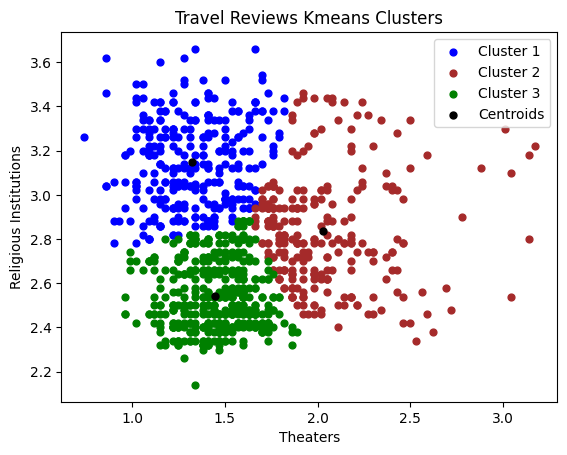

In [ ]:
#Visualizing the scatterplot of predicted clusters
plt.scatter(X[KMy_pred == 0, 0], X[KMy_pred == 0, 1], s = 24, c = "Blue", label = "Cluster 1")
plt.scatter(X[KMy_pred == 1, 0], X[KMy_pred == 1, 1], s = 24, c = "Brown", label = "Cluster 2")
plt.scatter(X[KMy_pred == 2, 0], X[KMy_pred == 2, 1], s = 24, c = "Green", label = "Cluster 3")
plt.scatter(KMalg.cluster_centers_[:, 0], KMalg.cluster_centers_[:, 1], s = 25, c = "black", label = "Centroids")
plt.title("Travel Reviews Kmeans Clusters")
plt.xlabel("Theaters")
plt.ylabel("Religious Institutions")
plt.legend()
plt.show()

**[2]: HIERARCHICAL (AGGLOMERATIVE) CLUSTERING**

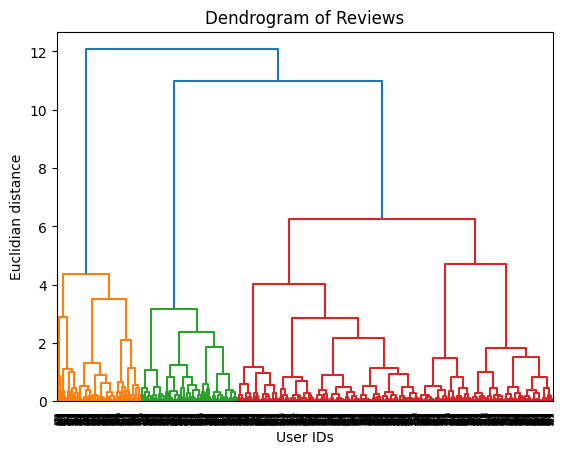

In [ ]:
#Using Dendogram to find optimal number of clusters
import scipy.cluster.hierarchy as sch
ddg = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram of Reviews")
plt.xlabel("User IDs")
plt.ylabel("Euclidian distance")
plt.show()

In [ ]:
#Building, training and predicting the model
from sklearn.cluster import AgglomerativeClustering
HAC = AgglomerativeClustering(n_clusters= 3, affinity = "euclidean", linkage = "ward")
y_pred = HAC.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
print(y_pred)

[0 0 0 0 0 2 2 0 0 1 0 2 0 1 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 2 2 0 1 1 1 1 0 0 0 2 0 1 0 2 2 0 0 0 0 0 0 1 2 0 0 2 0 0 0 0 0 1 2
 0 0 1 0 2 0 2 0 1 0 0 2 0 2 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 2 0 1 2 2 1 1
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 0 1 0 1 1 0 0 2 1 2 0 2 1 1 2 0 0
 1 0 2 0 0 0 0 1 0 1 0 2 0 1 0 0 2 0 0 1 0 0 1 0 0 2 2 0 2 0 0 0 1 0 0 2 1
 1 0 2 0 2 0 0 2 1 0 0 2 0 2 0 0 0 0 0 0 0 0 1 0 2 2 0 0 0 2 0 2 0 0 0 0 2
 0 0 0 2 0 0 2 0 1 0 2 0 0 0 2 0 0 2 0 0 1 1 1 0 0 0 2 0 0 0 0 0 1 1 2 0 0
 0 0 1 0 1 2 0 0 1 1 0 2 0 0 0 0 2 0 1 2 0 2 0 0 0 0 0 0 1 2 2 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 2 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 2 0 0 0 1 2 0 2 0 1 1 0 0 0 0 0 2 2 2 0 2 1 2 0 0 0 2 0 0 0 0 0 0
 1 1 0 0 1 0 0 2 0 1 2 1 0 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 2 2 0 0 1 0 0 2 0 0 1 2 2 2 0 0 0 0 0 2 0 0 0 1 2 0 2
 0 2 0 2 0 0 1 0 1 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 2 2 0 0 1 0 2 0 2 2 0 0 0
 0 2 1 0 0 0 1 2 1 2 2 0 

In [ ]:
#Introducing the Hierarchical cluster predictions as an additional column in the original dataset
DS["HAC Clusters"] = y_pred
DS.head()

,User ID,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Picnic&Park Spots,Beaches,Theaters,Religious Institutions,KMeans Clusters,HAC Clusters
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,2,0
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,2,0
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,2,0
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,2,0
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,2,0


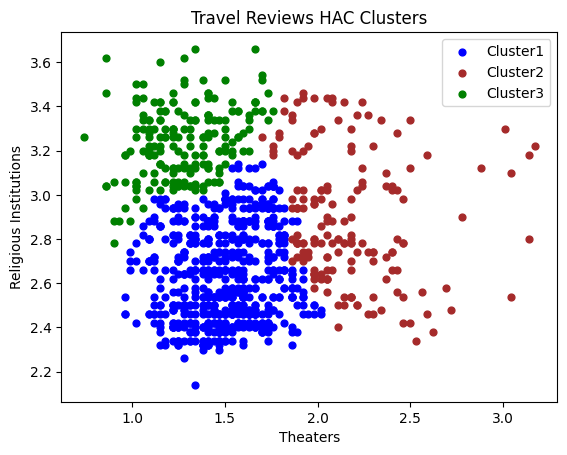

In [ ]:
#plotting the scatterplot for the HAC model
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 24, c = "Blue", label = "Cluster1")
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 24, c = "Brown", label = "Cluster2")
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 24, c = "Green", label = "Cluster3")
plt.title("Travel Reviews HAC Clusters")
plt.xlabel("Theaters")
plt.ylabel("Religious Institutions")
plt.legend()
plt.show()

**[3]: DBSCAN (DENSITY BASED CLUSTERING)**

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.25, min_samples= 10)
y_pred = dbscan.fit_predict(X)

np.unique(y_pred)

array([-1,  0])

In [ ]:
#Introducing the DBSCAN cluster predictions as an additional column in the original dataset
DS["DBSCAN Clusters"] = y_pred
DS.head()

,User ID,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Picnic&Park Spots,Beaches,Theaters,Religious Institutions,KMeans Clusters,HAC Clusters,DBSCAN Clusters
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,2,0,0
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,2,0,0
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,2,0,0
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,2,0,0
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,2,0,0


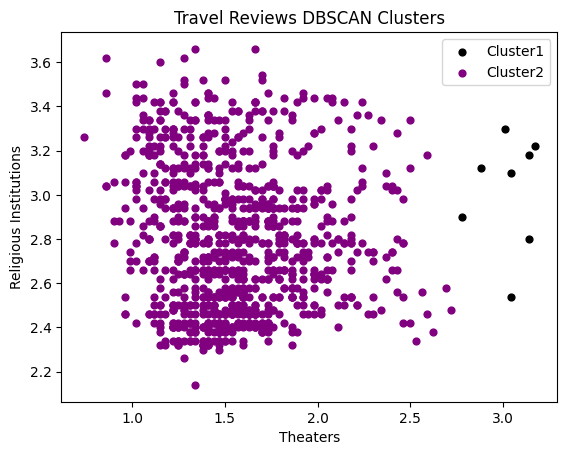

In [ ]:
plt.scatter(X[y_pred==-1, 0], X[y_pred==-1,1], s =24, c = 'black', label = "Cluster1")
plt.scatter(X[y_pred==0, 0], X[y_pred== 0,1], s =24, c = 'purple', label = "Cluster2")
plt.title("Travel Reviews DBSCAN Clusters")
plt.xlabel("Theaters")
plt.ylabel('Religious Institutions')
plt.legend()
plt.show()